In [1]:
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

In [2]:
# Load astronomy data
data = pd.read_csv('../../Data/DR3/espectros_normalizadosSY.csv')


In [52]:
data

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,id
0,0.298540,0.288910,0.270728,0.265745,0.281003,0.287176,0.266657,0.239145,0.244118,0.270922,...,0.893952,0.907187,0.906909,0.920086,0.939917,0.944382,0.975344,0.975237,1.000000,1
1,0.187321,0.059904,0.040154,0.150801,0.259516,0.217557,0.058846,0.153158,0.151218,0.288894,...,0.513965,0.522141,0.529018,0.552321,0.589843,0.627874,0.693038,0.742824,0.814167,1
2,0.354986,0.452690,0.350241,0.240637,0.276160,0.357691,0.339475,0.259200,0.261950,0.319587,...,0.757199,0.692856,0.618022,0.563389,0.534353,0.529347,0.580790,0.659196,0.799375,1
3,0.258981,0.205888,0.125221,0.119809,0.177436,0.203863,0.167638,0.136339,0.164524,0.195191,...,0.389137,0.420764,0.450557,0.487642,0.524829,0.544773,0.566638,0.553427,0.534909,1
4,0.058639,0.059465,0.030795,0.017400,0.030421,0.038995,0.027836,0.020623,0.035006,0.044762,...,0.878500,0.897841,0.905135,0.926023,0.952516,0.960777,0.991910,0.986293,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.222240,0.100221,0.044504,0.065901,0.097564,0.100197,0.081363,0.068870,0.092488,0.142955,...,0.746336,0.798232,0.839520,0.890440,0.941144,0.964865,1.000000,0.984885,0.975152,1
189,0.209241,0.241842,0.231943,0.195540,0.216914,0.263101,0.232148,0.143073,0.154275,0.280540,...,0.729426,0.734261,0.728344,0.734119,0.746700,0.749235,0.775427,0.779711,0.806542,1
190,0.469036,0.418741,0.588243,0.843116,1.000000,0.922588,0.615408,0.245139,0.064415,0.139017,...,0.593132,0.634211,0.667228,0.709789,0.756071,0.786710,0.835245,0.852406,0.886589,1
191,0.092077,0.080549,0.089059,0.102926,0.110376,0.107294,0.094674,0.076398,0.067334,0.076202,...,0.169598,0.179376,0.188147,0.200449,0.213928,0.222166,0.233527,0.233113,0.233347,1


In [53]:
# Preprocess the data by standardizing it
data_standardized = (data - data.mean()) / data.std()


In [54]:
data_standardized.drop(columns='id', inplace=True)

In [55]:
data_standardized

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
0,1.413603,1.430733,1.378729,1.266793,1.219717,1.270424,1.366372,1.490274,1.563854,1.542982,...,0.943805,0.886410,0.823444,0.758124,0.695319,0.641316,0.600095,0.583557,0.585798,0.601529
1,0.601284,-0.297205,-0.438127,0.394026,1.070436,0.781746,-0.315220,0.675369,0.683102,1.696565,...,-0.702368,-0.778574,-0.849293,-0.898331,-0.909768,-0.871735,-0.758831,-0.612074,-0.411577,-0.174611
2,1.825869,2.666516,2.005272,1.076149,1.186072,1.765388,1.955612,1.680339,1.732919,1.958852,...,0.634147,0.287202,-0.107661,-0.508187,-0.861466,-1.111568,-1.181856,-1.087466,-0.770457,-0.236392
3,1.124674,0.804301,0.232173,0.158704,0.500190,0.685623,0.565114,0.515974,0.809247,0.895811,...,-1.344691,-1.325531,-1.289698,-1.242257,-1.192056,-1.152734,-1.115624,-1.147405,-1.224351,-1.340945
4,-0.338568,-0.300518,-0.511878,-0.618882,-0.521197,-0.471636,-0.566154,-0.580672,-0.418674,-0.389703,...,0.857959,0.818702,0.782845,0.750351,0.721234,0.695771,0.670487,0.653718,0.633241,0.601529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.856323,0.006999,-0.403851,-0.250614,-0.054720,-0.042042,-0.133013,-0.123436,0.126296,0.449419,...,0.139633,0.239600,0.350119,0.462730,0.565931,0.646621,0.688041,0.687979,0.627201,0.497750
189,0.761386,1.075583,1.073114,0.733729,0.774459,1.101429,1.087126,0.579796,0.712082,1.625175,...,0.248804,0.165507,0.072211,-0.024600,-0.116322,-0.193787,-0.237769,-0.263136,-0.253281,-0.206457
190,2.658860,2.410356,3.880660,5.650758,6.214955,5.730575,4.188440,1.547081,-0.139861,0.415764,...,-0.499669,-0.431690,-0.362430,-0.292497,-0.222508,-0.153284,-0.076867,-0.009795,0.058681,0.127863
191,-0.094348,-0.141433,-0.052775,0.030518,0.034288,0.007775,-0.025306,-0.052089,-0.112178,-0.121034,...,-2.244511,-2.287479,-2.338349,-2.392512,-2.445494,-2.496478,-2.500740,-2.558200,-2.598943,-2.600431


In [56]:
# Perform LLE on the data
hlle = LocallyLinearEmbedding(n_components=10, n_neighbors=70, method='hessian', eigen_solver='dense')
hlle_transformed = hlle.fit_transform(data_standardized)

In [57]:
lle = LocallyLinearEmbedding(n_components=10, n_neighbors=50)
lle_transformed = lle.fit_transform(data_standardized)

In [58]:
hlle

LocallyLinearEmbedding(eigen_solver='dense', method='hessian', n_components=10,
                       n_neighbors=70)

In [59]:
hlle_transformed

array([[-0.10830154, -0.01164503, -0.09407318, ..., -0.0321098 ,
        -0.02276657, -0.05486719],
       [-0.01878685, -0.08706949,  0.10639844, ...,  0.16089276,
         0.20913587, -0.1745846 ],
       [-0.16590524, -0.20596868, -0.16503453, ...,  0.10385198,
         0.23047913,  0.0351744 ],
       ...,
       [ 0.07932098, -0.10287793, -0.10884761, ...,  0.08471496,
         0.19414276, -0.15582207],
       [ 0.09240875, -0.0687107 ,  0.11318487, ..., -0.02650123,
        -0.04677657, -0.06867896],
       [-0.0060174 ,  0.04505236, -0.07850713, ..., -0.04035623,
        -0.03489317, -0.04066518]])

In [60]:
lle_transformed

array([[ 2.31846350e-02,  8.97912407e-02,  1.24591454e-01, ...,
         4.56928752e-02, -2.73054322e-02,  7.00573392e-02],
       [-1.16520228e-01,  2.67172876e-02, -6.03318922e-02, ...,
         1.55897698e-01,  6.45666411e-02, -8.74927040e-02],
       [-1.37763045e-01,  1.26925307e-01,  2.31987343e-01, ...,
        -1.78793936e-01, -3.19999347e-02, -5.43420047e-02],
       ...,
       [-4.52826234e-02, -9.87980741e-02,  1.33086110e-01, ...,
         1.93317041e-01, -9.75756376e-02, -2.32301098e-01],
       [-1.05948387e-01, -8.19510160e-02, -8.12757070e-02, ...,
         6.89312481e-03,  3.75810319e-02,  5.96232647e-02],
       [ 7.25563140e-02, -3.56226613e-05,  8.34308608e-02, ...,
         7.81356180e-02,  1.09024380e-01,  7.14529602e-02]])

C:\Users\joshp\AppData\Local\Temp\ipykernel_10684\2126325663.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


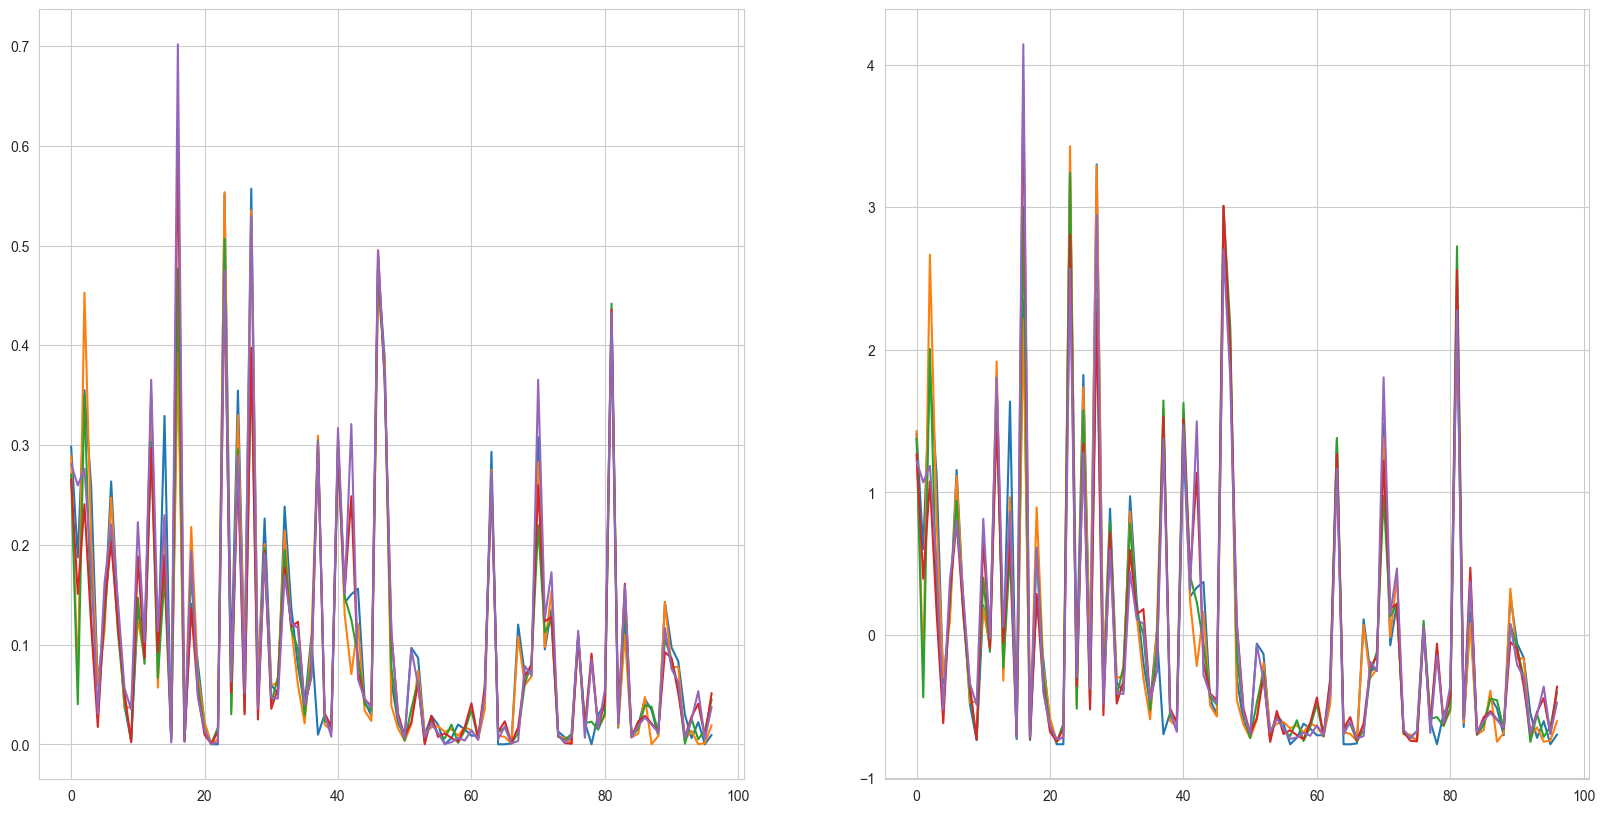

In [61]:
fig = plt.figure(figsize=(20,10))
ax =fig.subplots(1,2)

ax[0].plot(data.iloc[0:97,:5])

ax[1].plot(data_standardized.iloc[0:97,:5])

fig.show()

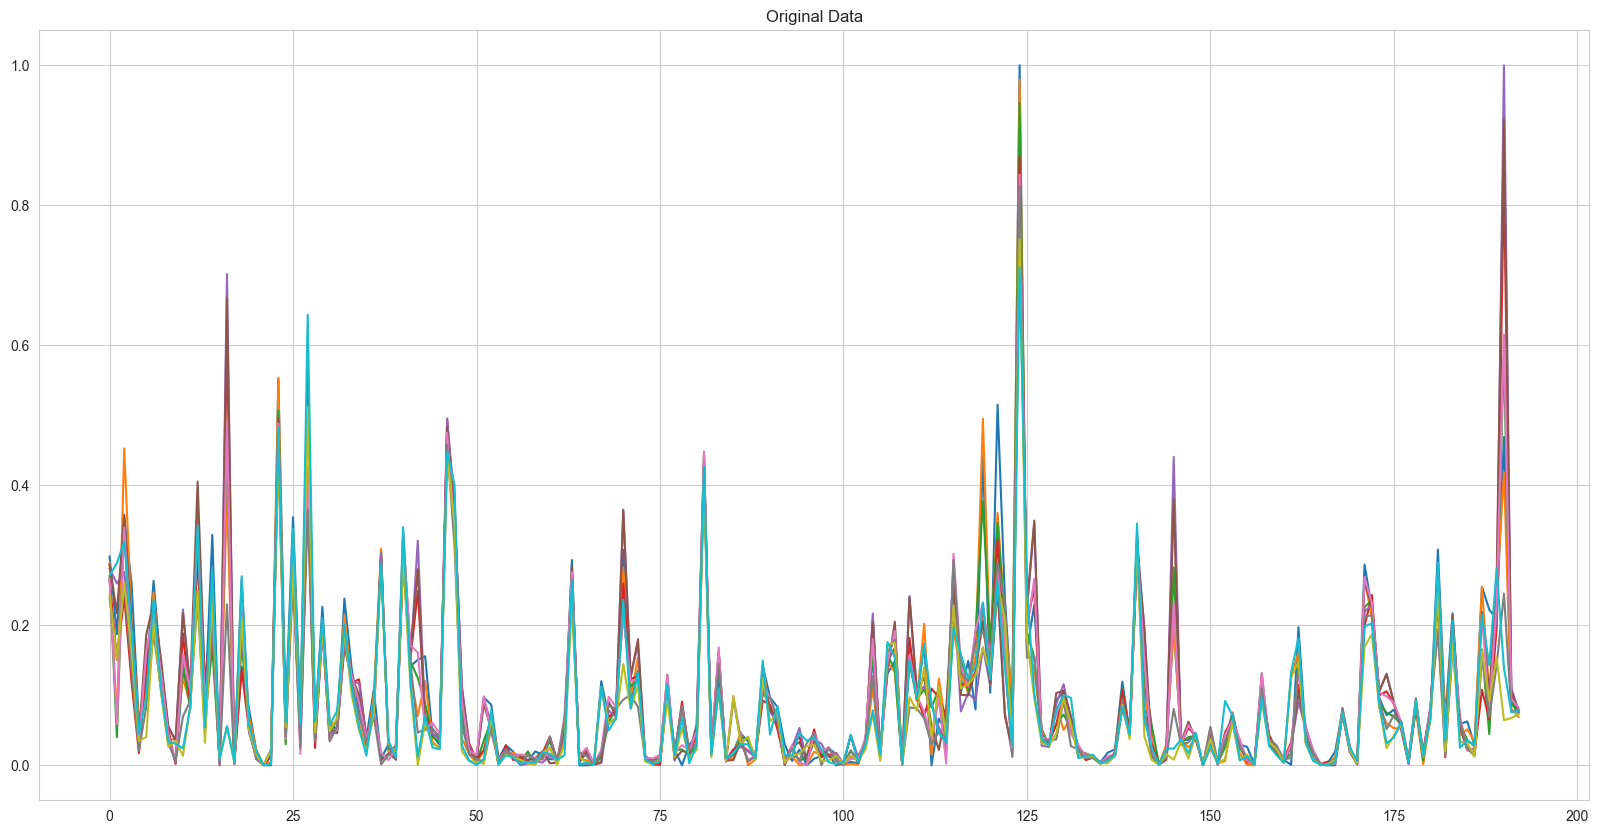

In [62]:
plt.figure(figsize=(20,10))
plt.title("Original Data")
plt.plot(data.iloc[:193, 0:10])
plt.show()

In [63]:

hlle_transformed.shape

(193, 10)

In [64]:
lle_transformed.shape

(193, 10)

In [65]:
lle_transformed_data =  pd.DataFrame(lle_transformed)

In [66]:
hlle_transformed_data =  pd.DataFrame(hlle_transformed)

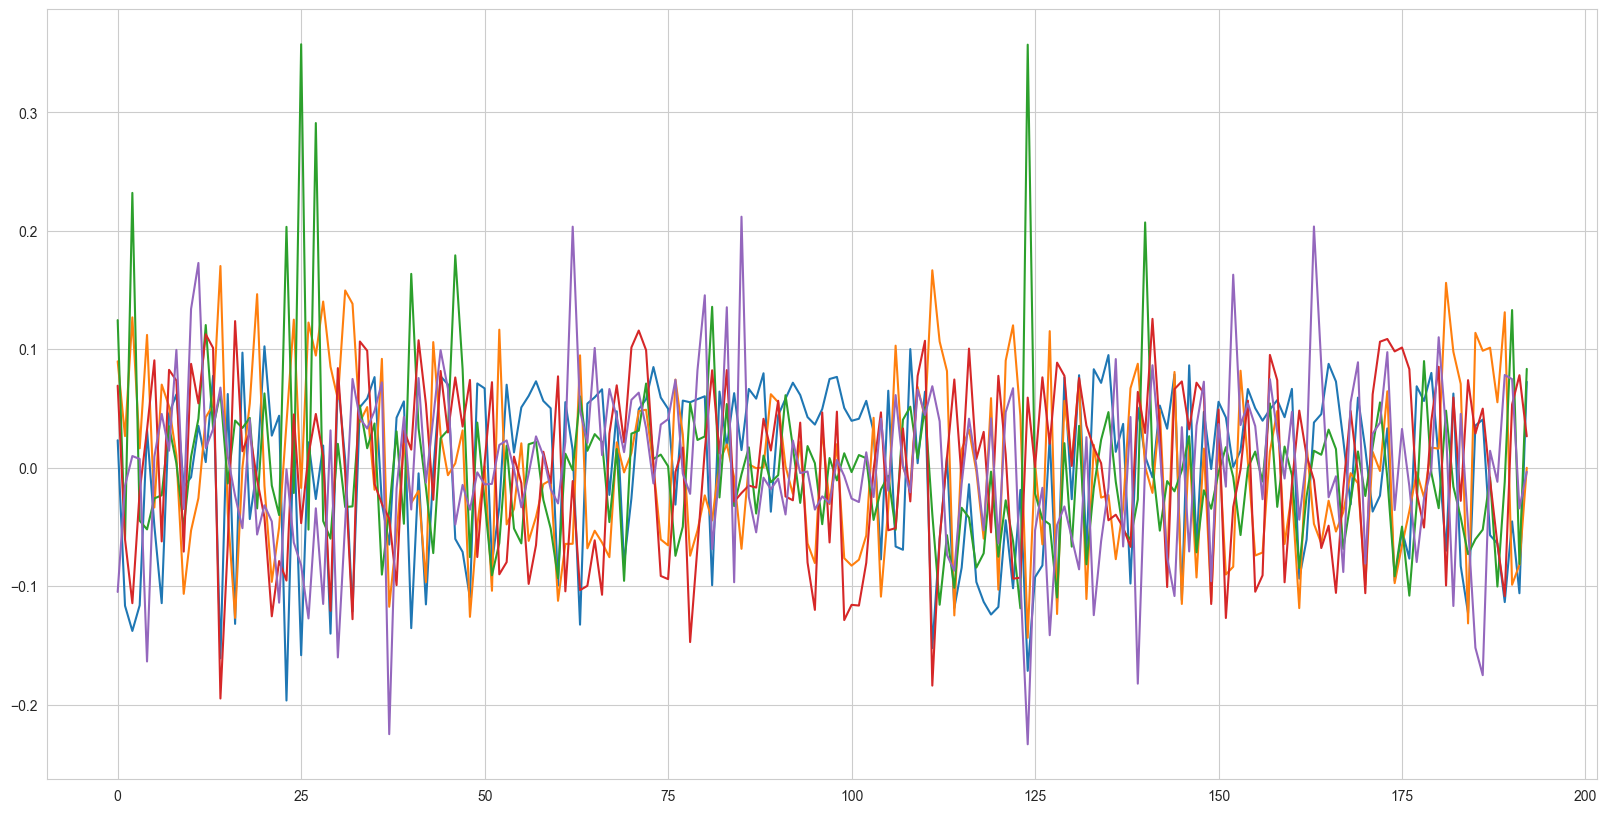

In [67]:
plt.figure(figsize=(20,10))
plt.plot(lle_transformed_data.iloc[0:193, 0:5])
plt.show()

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=14)

In [70]:
pca_transformed = pca.fit_transform(data_standardized)

In [71]:
pca_transformed_data =  pd.DataFrame(pca_transformed)

In [72]:
pca_transformed_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,18.905115,-3.782336,7.285011,-3.407863,-0.640095,0.007469,1.006216,1.122525,0.668761,-0.158797,0.171749,-0.066730,-0.732735,-0.222725
1,12.409046,8.820514,-6.724351,1.506601,-1.471502,-1.143519,0.850713,-2.974718,3.916372,-1.829600,-0.090841,2.439140,0.018537,1.458124
2,46.048622,17.019968,11.196368,6.001887,6.399389,0.173076,-1.961232,-2.499186,-0.115871,1.456986,-0.513980,1.677880,3.337252,-1.770644
3,10.863688,9.916138,-5.963437,0.400748,-0.753062,-0.230863,-0.712308,2.138077,0.703273,0.140786,0.259607,-0.630228,0.893328,0.326724
4,15.160627,-11.679342,-2.007249,-1.612083,2.313175,-1.663447,2.496497,0.219313,1.061334,0.452434,0.262808,-0.622926,-0.665778,-0.727887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,11.734845,0.140652,-7.170929,1.405106,-2.665197,-2.078776,0.857238,-3.820973,2.580054,-0.893896,1.107578,1.257390,-0.788269,1.251664
189,33.430279,4.179621,-5.160943,3.124618,-1.568818,1.841246,0.304007,0.299618,-0.441579,-0.988416,-1.453115,0.437393,1.387373,0.564363
190,-9.422094,15.293656,6.206261,-3.331810,-6.437549,3.241515,3.995564,-3.897991,-1.046167,3.715633,-4.759136,0.050588,0.428892,0.024736
191,-10.536677,12.529232,-6.593757,-2.751121,2.031576,-0.628095,-1.028680,1.055916,0.175802,-0.688795,-0.850904,0.159570,0.253300,-0.372202


C:\Users\joshp\AppData\Local\Temp\ipykernel_10684\1829124812.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


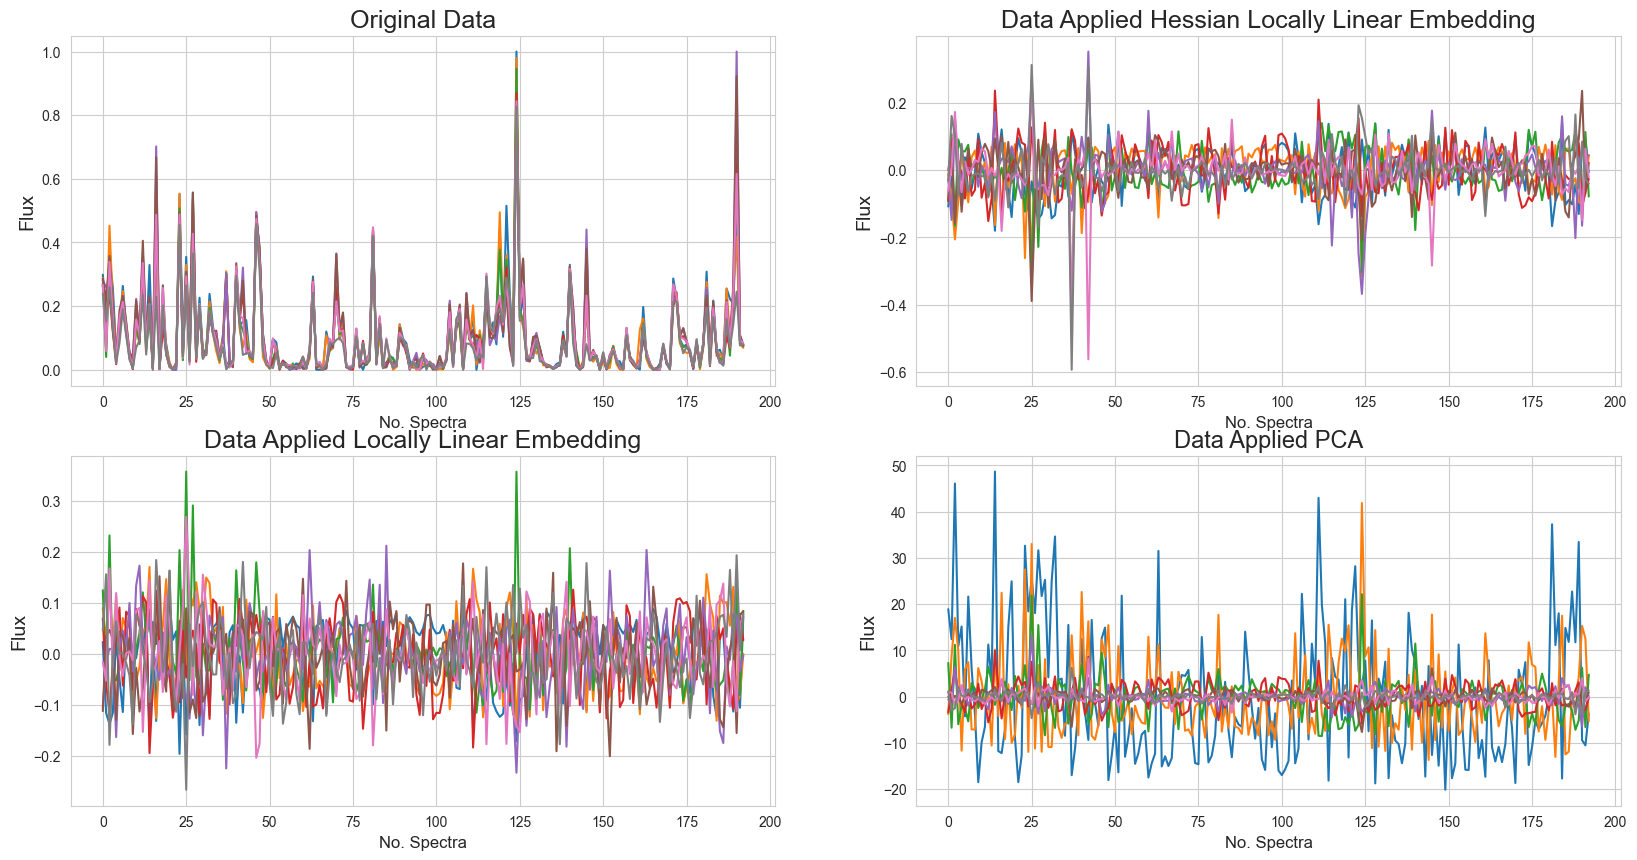

In [74]:
fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Flux", fontsize=14)
ax[0,0].set_xlabel("No. Spectra", fontsize=12)
ax[0,0].plot(data.iloc[0:193,:8])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Flux", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data.iloc[0:193,0:8])


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Flux", fontsize=14)
ax[1,0].set_xlabel("No. Spectra", fontsize=12)
ax[1,0].plot(lle_transformed_data.iloc[0:193,0:8])

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Flux", fontsize=14)
ax[1,1].set_xlabel("No. Spectra", fontsize=12)
ax[1,1].plot(pca_transformed_data.iloc[0:193,0:8])

fig.show()
#plt.plot(lle_transformed[0:20])
#plt.plot(data[0:100:5])


In [44]:
for i in range(1,20):
  data = []
  pca = PCA(n_components=i)
  features_reduced = pca.fit_transform(data_standardized)
  print(f"n = {i}")
  print(pca.explained_variance_ratio_.sum())
  data.append(pca.explained_variance_ratio_.sum())

n = 1
0.6258202907550073
n = 2
0.870232579475475
n = 3
0.930424464921709
n = 4
0.9523496029082885
n = 5
0.9627490719662991
n = 6
0.9696011093106687
n = 7
0.9745886169386466
n = 8
0.9783181072721038
n = 9
0.9810050214532403
n = 10
0.9833444730197602
n = 11
0.9852797289377925
n = 12
0.9870398994972964
n = 13
0.9885323648381581
n = 14
0.9898270512453818
n = 15
0.9908783499107263
n = 16
0.9917976604846104
n = 17
0.9924903658102194
n = 18
0.9931204265144533
n = 19
0.9935766743235181


In [76]:
lle_transformed_data.to_csv("output/DATA_PCA_LLE_HESSIAN.csv", index=False)